<a href="https://www.kaggle.com/code/bhavinmoriya/learn-monte-carlo-simulation?scriptVersionId=255681603" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from scipy.stats import norm

# Parameters of the Gaussian distribution
mu = 0      # Mean
sigma = 1   # Standard deviation

# Points between which to find the area
a = -1
b = 1

# Calculate the area under the curve between a and b
area = norm.cdf(b, mu, sigma) - norm.cdf(a, mu, sigma)

print(f"The area under the Gaussian curve between {a} and {b} is: {area:.4f}")


The area under the Gaussian curve between -1 and 1 is: 0.6827


In [2]:
total_area = norm.cdf(float('inf'), mu, sigma) - norm.cdf(float('-inf'), mu, sigma)
print(f"The total area under the Gaussian curve is: {total_area:.4f}")


The total area under the Gaussian curve is: 1.0000


In [3]:
mu = 5      # Mean
sigma = 2   # Standard deviation

a = 3
b = 7

area = norm.cdf(b, mu, sigma) - norm.cdf(a, mu, sigma)
print(f"The area under the Gaussian curve between {a} and {b} is: {area:.4f}")


The area under the Gaussian curve between 3 and 7 is: 0.6827


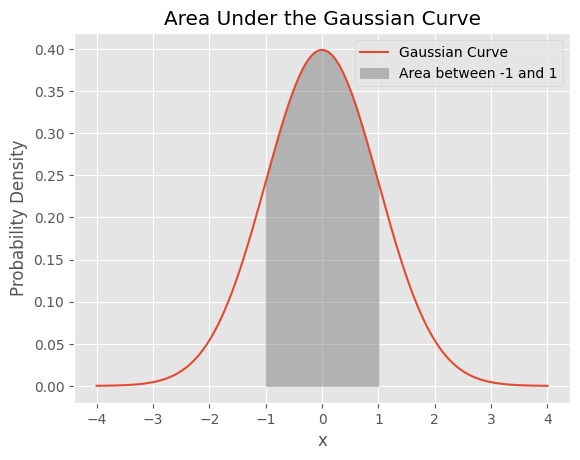

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.style.use("ggplot")

mu = 0
sigma = 1
a = -1
b = 1

# Generate points for plotting
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

# Plot the Gaussian curve
plt.plot(x, y, label='Gaussian Curve')

# Fill the area between a and b
x_fill = np.linspace(a, b, 100)
y_fill = norm.pdf(x_fill, mu, sigma)
plt.fill_between(x_fill, y_fill, color='gray', alpha=0.5, label=f'Area between {a} and {b}')

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Area Under the Gaussian Curve')
plt.legend()
plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def monte_carlo_gaussian_area(mu, sigma, a, b, num_samples=1000000):
    # Define the Gaussian function
    def gaussian(x):
        return norm.pdf(x, mu, sigma)

    # Determine the range for sampling
    x_min = mu - 4 * sigma
    x_max = mu + 4 * sigma

    # Determine the maximum value of the Gaussian within the range
    y_max = gaussian(mu)

    # Generate random points within the bounding box
    x_random = np.random.uniform(x_min, x_max, num_samples)
    y_random = np.random.uniform(0, y_max, num_samples)

    # Determine which points fall under the Gaussian curve
    y_gaussian = gaussian(x_random)
    under_curve = y_random <= y_gaussian

    # Determine which points fall within the interval [a, b]
    within_interval = (x_random >= a) & (x_random <= b)

    # Calculate the area under the curve between a and b
    total_area = (x_max - x_min) * y_max
    points_under_curve_and_in_interval = np.sum(under_curve & within_interval)
    estimated_area = total_area * (points_under_curve_and_in_interval / num_samples)

    return estimated_area

# Parameters of the Gaussian distribution
mu = 0      # Mean
sigma = 1   # Standard deviation

# Points between which to find the area
a = -1
b = 1

# Number of samples for Monte Carlo simulation
num_samples = 1000000

# Estimate the area using Monte Carlo simulation
estimated_area = monte_carlo_gaussian_area(mu, sigma, a, b, num_samples)

print(f"Estimated area under the Gaussian curve between {a} and {b} is: {estimated_area:.4f}")


Estimated area under the Gaussian curve between -1 and 1 is: 0.6819


In [6]:
a=-100_000
b=-a
# Estimate the area using Monte Carlo simulation
estimated_area = monte_carlo_gaussian_area(mu, sigma, a, b, num_samples)

print(f"Estimated area under the Gaussian curve between {a} and {b} is: {estimated_area:.4f}")

Estimated area under the Gaussian curve between -100000 and 100000 is: 1.0017
